In [1]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
from sklearn.preprocessing import MinMaxScaler  # 0.0 ~ 1.0 사이로 스케일링
from sklearn.preprocessing import LabelEncoder  # String ==> int
from sklearn.model_selection import train_test_split

In [4]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
from keras.utils import np_utils

In [6]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [7]:
names = ['sl', 'sw', 'pl', 'pw', 'class']

In [8]:
df = pd.read_csv('datasets/iris.data', names=names)

In [9]:
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.shape

(150, 5)

In [11]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
Y_encoded = LabelEncoder().fit_transform(df['class'])
# 'Iris-setosa' ==> 0, 'Iris-versicolor' ==> 1, 'Iris-virginica' ==> 2

In [13]:
Y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
Y = np_utils.to_categorical(Y_encoded)  # One Hot Encoding
# 0 ==> [1,0,0], 1 ==> [0,1,0], 2 ==> [0,0,1]

In [15]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [16]:
X = df.drop('class', axis=1)

In [17]:
X

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [19]:
check_pointer = ModelCheckpoint(filepath='iris_model.h5', monitor='val_loss',
                               verbose=1, save_best_only=True)

In [20]:
early_stoper = EarlyStopping(monitor='val_loss', patience=3)

In [21]:
model = Sequential()

In [22]:
model.add(Dense(256, activation='relu', input_shape=(4,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
%%time
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.1,
                 callbacks=[check_pointer, early_stoper])

Train on 121 samples, validate on 14 samples
Epoch 1/50
121/121 [==============================] - 0s 4ms/step - loss: 1.0847 - acc: 0.3471 - val_loss: 0.8993 - val_acc: 0.6429

Epoch 00001: val_loss improved from inf to 0.89929, saving model to iris_model.h5
Epoch 2/50
121/121 [==============================] - 0s 107us/step - loss: 0.8955 - acc: 0.7273 - val_loss: 0.8578 - val_acc: 0.8571

Epoch 00002: val_loss improved from 0.89929 to 0.85777, saving model to iris_model.h5
Epoch 3/50
121/121 [==============================] - 0s 157us/step - loss: 0.7769 - acc: 0.9256 - val_loss: 0.7336 - val_acc: 0.6429

Epoch 00003: val_loss improved from 0.85777 to 0.73357, saving model to iris_model.h5
Epoch 4/50
121/121 [==============================] - 0s 107us/step - loss: 0.6681 - acc: 0.6777 - val_loss: 0.6230 - val_acc: 0.6429

Epoch 00004: val_loss improved from 0.73357 to 0.62297, saving model to iris_model.h5
Epoch 5/50
121/121 [==============================] - 0s 99us/step - loss: 0.

In [25]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


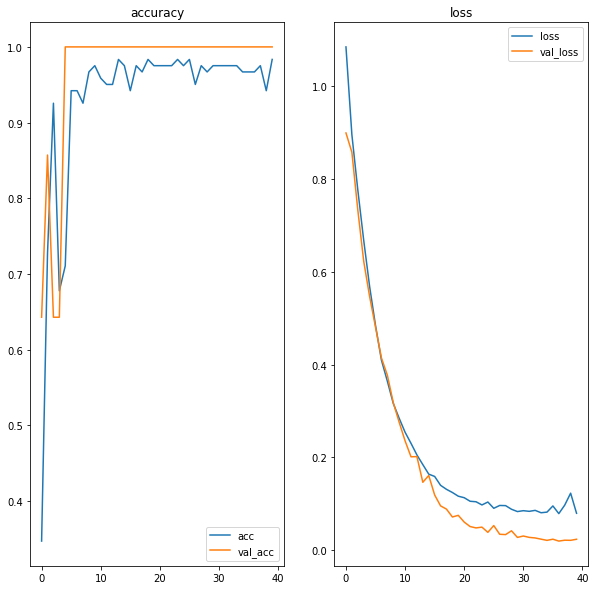

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)  # 121
plt.plot(hist.history['acc'])     # train accuracy
plt.plot(hist.history['val_acc']) # validation accuracy
plt.title('accuracy')
plt.legend(['acc', 'val_acc'])
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])      # train loss
plt.plot(hist.history['val_loss'])  # validation loss
plt.title('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [27]:
loss_score = model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 133us/step


In [28]:
print(loss_score)
# [0.0979449525475502, 0.9333333373069763], [loss, score], 93.3% 정확도

[0.1413884162902832, 0.9333333373069763]


In [29]:
pred = model.predict(X_test)
print(pred)
print(y_test)
print(model.predict_classes(X_test))

[[6.17071229e-04 9.03424501e-01 9.59584415e-02]
 [9.99498606e-01 5.01406495e-04 2.36666224e-08]
 [9.80141301e-09 2.17993118e-04 9.99782026e-01]
 [6.25751331e-04 8.11969817e-01 1.87404394e-01]
 [3.39808437e-04 9.27831054e-01 7.18291253e-02]
 [9.98904824e-01 1.09502405e-03 1.11504377e-07]
 [3.50841088e-03 9.93802428e-01 2.68911757e-03]
 [5.68872883e-06 2.72730179e-02 9.72721279e-01]
 [1.14618175e-04 2.02930704e-01 7.96954691e-01]
 [1.47063273e-03 9.93625402e-01 4.90386551e-03]
 [2.85726510e-05 9.09370780e-02 9.09034371e-01]
 [9.98555005e-01 1.44463766e-03 3.00103721e-07]
 [9.99623060e-01 3.76954355e-04 2.46877772e-08]
 [9.98608887e-01 1.39090465e-03 2.39284446e-07]
 [9.99497175e-01 5.02788869e-04 4.31651550e-08]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0]


In [30]:
# RNN ==> LSTM 실습 : 비트코인 가격 예측

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
import requests

In [34]:
from keras.models import Sequential

In [35]:
from keras.layers import Dense

In [36]:
from keras.layers import Dropout

In [37]:
from keras.layers import LSTM

In [38]:
# url = "https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400"
# ret = requests.get(url)  # <Response [200]>
# json_data = ret.json()
# df_origin = pd.DataFrame(json_data)
# df_origin
# df_origin.to_csv('bitcoin_origin.csv', encoding='utf-8', index=False)
# scaler = MinMaxScaler()
# df_origin[['close']] = scaler.fit_transform(df_origin[['close']])
# df_origin.head()
# df_origin.to_csv("bitcoin_scaled.csv", encoding='utf-8', index=False)
# del df_origin

In [39]:
df = pd.read_csv("bitcoin_scaled.csv")

In [40]:
df.shape

(2014, 8)

In [41]:
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000,225.00,225.000000,0.003428,46.276313,0.193117,239.627778
1,1424390400,245.000,240.25,240.250118,0.003231,55.894897,0.230429,242.568479
2,1424476800,245.000,245.00,245.000000,0.003480,14.722239,0.060091,245.000000
3,1424563200,249.000,235.00,245.000000,0.002955,129.121248,0.539055,239.532608
4,1424649600,235.001,235.00,235.000002,0.002955,96.567562,0.410926,235.000062


In [42]:
price = df['close']

In [43]:
price[:10]

0    0.003428
1    0.003231
2    0.003480
3    0.002955
4    0.002955
5    0.003205
6    0.003100
7    0.003139
8    0.003690
9    0.003218
Name: close, dtype: float64

In [44]:
window_size = 5

In [45]:
X = []
Y = []

In [46]:
for i in range(len(price) - window_size):  # 2014 - 5 ==> 2009
    X.append( price.iloc[i:i+window_size] )  # 예) 0:5 ==> 0,1,2,3,4
    Y.append( price.iloc[i+window_size] )    # 예) 0+5 ==> 5

In [47]:
X = np.array(X)
Y = np.array(Y)

In [48]:
X.shape, Y.shape

((2009, 5), (2009,))

In [49]:
X[0]

array([0.00342784, 0.00323093, 0.00348035, 0.00295525, 0.00295525])

In [50]:
Y[0]

0.0032046727572156808

In [51]:
len(X)  # 2009

2009

In [52]:
split_val = len(X) - 209  # 2009 - 209 ==> 1800

In [53]:
X_train = X[:split_val, :]
y_train = Y[:split_val]

In [54]:
X_test = X[split_val:, :]
y_test = Y[split_val:]

In [55]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1800, 5), (1800,), (209, 5), (209,))

In [56]:
# reshape
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))

In [57]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1800, 5, 1), (1800,), (209, 5, 1), (209,))

In [58]:
model = Sequential()

In [59]:
model.add(LSTM(128, input_shape=(5, 1)))  # (feature의_수, dimension)
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

In [60]:
model.compile(loss='mse', optimizer='adam')

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [62]:
%%time
model.fit(X_train, y_train, epochs=3, batch_size=1)

Epoch 1/3
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0019
Epoch 2/3
1800/1800 [==============================] - 11s 6ms/step - loss: 0.0011
Epoch 3/3
1800/1800 [==============================] - 10s 6ms/step - loss: 9.9201e-04
Wall time: 33.8 s


In [63]:
train_predict = model.predict(X_train)

In [64]:
test_predict = model.predict(X_test)

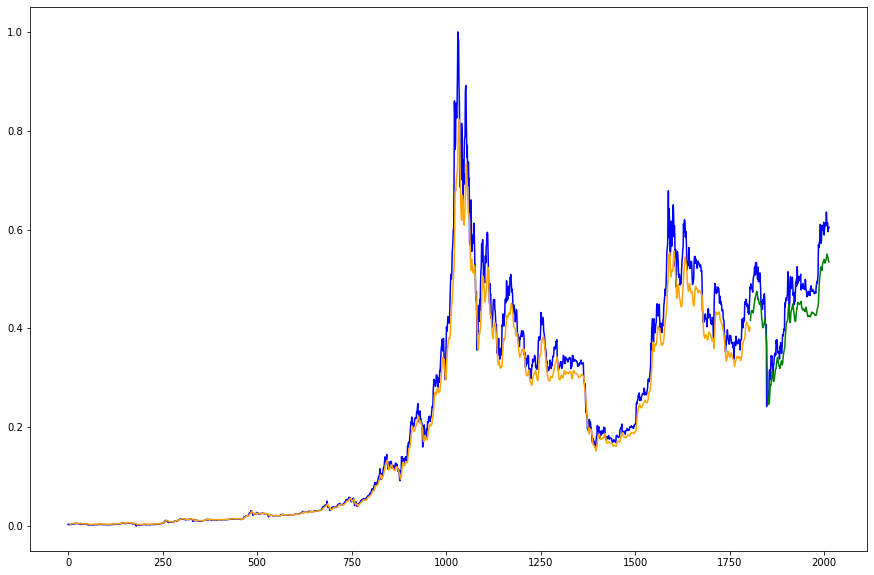

In [65]:
plt.figure(figsize=(15,10))
plt.plot(price, color='blue')
split_pt = split_val + window_size  # 1800 + 5 ==> 1805
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='orange')
plt.plot(np.arange(split_pt, split_pt+len(test_predict),1), test_predict, color='green')
plt.show()

In [66]:
# ! conda install -c plotly plotly=4.9.0 -y
# ! pip install plotly==4.9.0

In [ ]:
# end